In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../Dataset/crm_clean_master_data.csv")

## Time Series Analysis

In [5]:
TimeSeries_data = data[data['deal_status'] == 'Closed'].copy()

TimeSeries_data['close_date'] = pd.to_datetime(
    TimeSeries_data['close_date'],
    errors='coerce'
)

TimeSeries_data['close_month'] = TimeSeries_data['close_date'].dt.to_period('M').astype(str)
TimeSeries_data['close_year'] = TimeSeries_data['close_date'].dt.year


## Monthly Revenue Trend

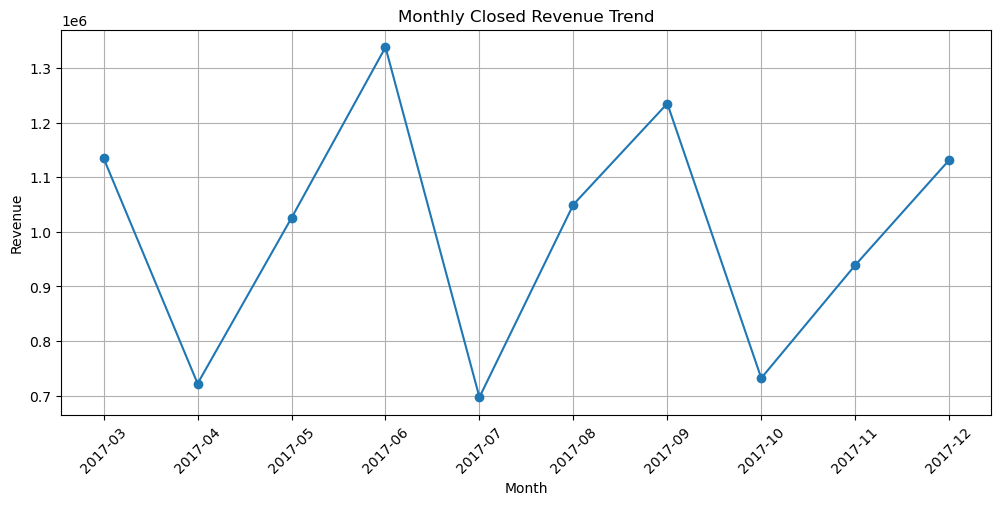

In [8]:
monthly_revenue = (
    TimeSeries_data
    .groupby('close_month')['close_value']
    .sum()
    .reset_index()
)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(monthly_revenue['close_month'], monthly_revenue['close_value'], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Closed Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.savefig("monthly_revnue_trend.png", dpi=300,bbox_inches="tight")
plt.show()


## Deal Volume vs Revenue Trend

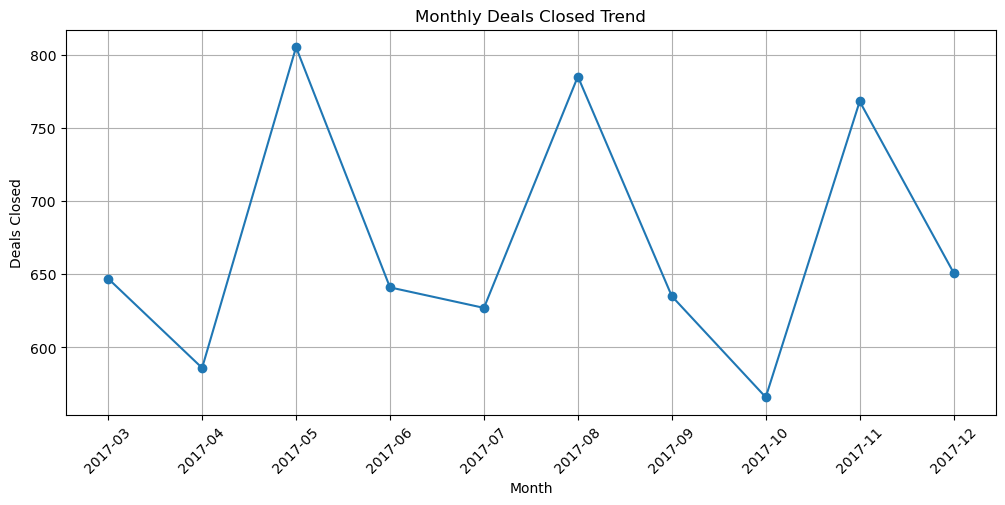

In [10]:
monthly_deals = (
    TimeSeries_data
    .groupby('close_month')['opportunity_id']
    .count()
    .reset_index(name='deals_closed')
)

plt.figure(figsize=(12,5))
plt.plot(monthly_deals['close_month'], monthly_deals['deals_closed'], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Deals Closed Trend")
plt.xlabel("Month")
plt.ylabel("Deals Closed")
plt.grid(True)
plt.savefig("deal_volume_revenue_trend.png", dpi=300,bbox_inches="tight")
plt.show()


## Average Deal Size Over Time


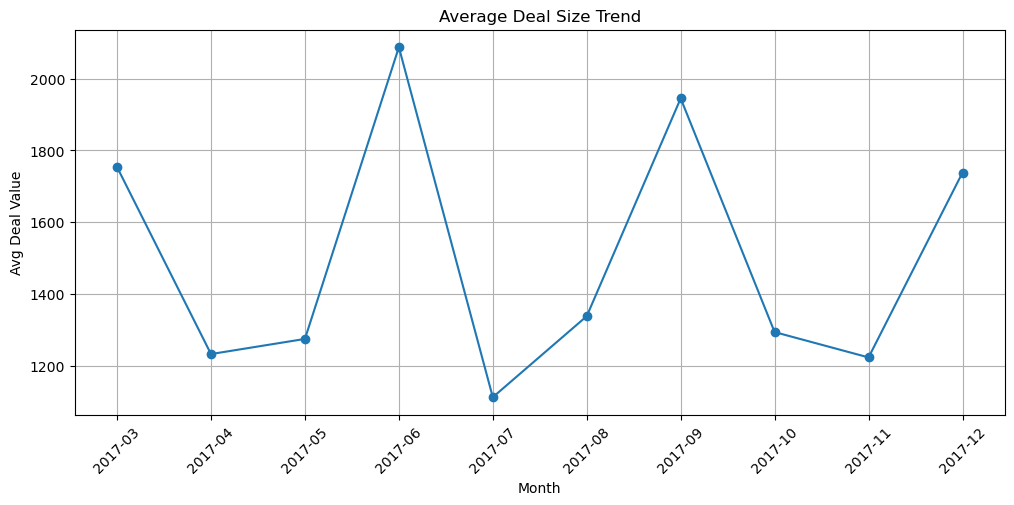

In [11]:
monthly_avg_deal = (
    TimeSeries_data
    .groupby('close_month')['close_value']
    .mean()
    .reset_index()
)

plt.figure(figsize=(12,5))
plt.plot(monthly_avg_deal['close_month'], monthly_avg_deal['close_value'], marker='o')
plt.xticks(rotation=45)
plt.title("Average Deal Size Trend")
plt.xlabel("Month")
plt.ylabel("Avg Deal Value")
plt.grid(True)
plt.savefig("average_deal_size_overTime.png", dpi=300,bbox_inches="tight")
plt.show()


## Sales Cycle Trend

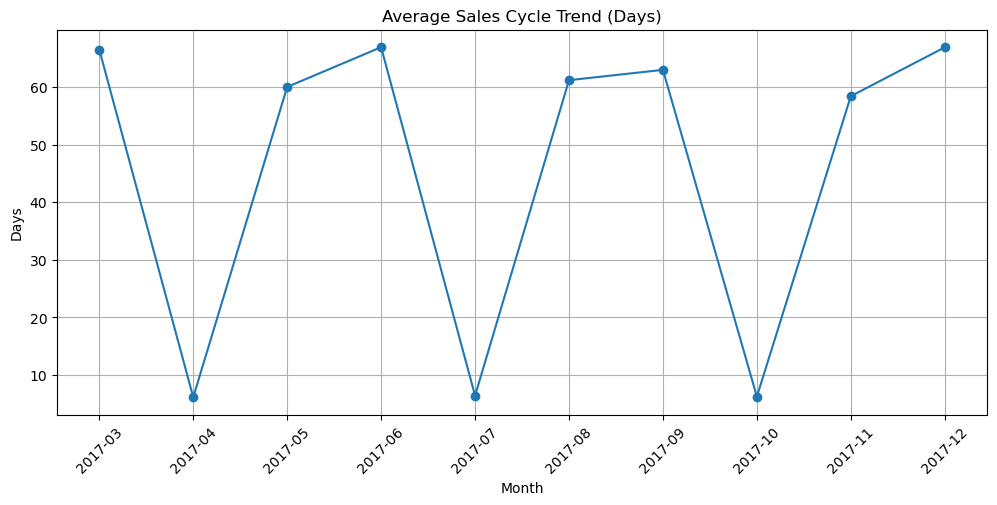

In [ ]:
monthly_cycle = (
    TimeSeries_data
    .groupby('close_month')['sales_cycle_days']
    .mean()
    .reset_index()
)

plt.figure(figsize=(12,5))
plt.plot(monthly_cycle['close_month'], monthly_cycle['sales_cycle_days'], marker='o')
plt.xticks(rotation=45)
plt.title("Average Sales Cycle Trend (Days)")
plt.xlabel("Month")
plt.ylabel("Days")
plt.grid(True)
plt.savefig("Sales_Cycle_Trend.png", dpi=300,bbox_inches="tight")
plt.show()
